# 🔄 Query Rephrasing Techniques Demo

This notebook demonstrates different query rephrasing techniques used in retrieval systems to improve search quality and relevance.  

## 📝 Overview

We'll explore four main query processing techniques:

**🔍 Query Expansion** – Add synonyms, related terms, or contextual entities  
**🪓 Query Decomposition** – Break compound queries into atomic sub-queries  
**✏️ Query Rewriting** – Make context-dependent queries standalone  
**🤖 Self-Querying** – Transform complex input into optimal search queries  

In [12]:
# # Import required modules
from retrieval_playground.src.pre_retrieval.query_rephrasing import (
    expand_query,
    decompose_query,
    rewrite_query,
    self_query,
    QUERY_EXAMPLES
)

2025-09-16 16:43:08.359 INFO model_manager - _initialize_models: 🔄 ModelManager: Initializing shared AI models...


2025-09-16 16:43:08 - rp_logger - INFO - model_manager.py:61 - _initialize_models() - 🔄 ModelManager: Initializing shared AI models...
2025-09-16 16:43:08 - sentence_transformers.SentenceTransformer - INFO - SentenceTransformer.py:219 - __init__() - Use pytorch device_name: mps
2025-09-16 16:43:08 - sentence_transformers.SentenceTransformer - INFO - SentenceTransformer.py:227 - __init__() - Load pretrained SentenceTransformer: Qwen/Qwen3-Embedding-0.6B
2025-09-16 16:43:17 - sentence_transformers.SentenceTransformer - INFO - SentenceTransformer.py:378 - __init__() - 1 prompt is loaded, with the key: query


2025-09-16 16:43:17.403 INFO model_manager - _initialize_models: ✅ ModelManager: Shared AI models initialized successfully


2025-09-16 16:43:17 - rp_logger - INFO - model_manager.py:77 - _initialize_models() - ✅ ModelManager: Shared AI models initialized successfully


## 1. Query Expansion 🔍

🎯 **Purpose**: Expand queries by replacing abbreviations, adding context, or enriching with domain-specific terms.

🗒️ **When to use**: 
- Queries contain abbreviations or acronyms
- Queries are too broad or vague
- Queries lack domain-specific terms
- Queries are incomplete questions or direct phrases


In [13]:
print("=" * 60)
print("QUERY EXPANSION EXAMPLES")
print("=" * 60)

expansion_examples = QUERY_EXAMPLES["expansion"]

for i, example in enumerate(expansion_examples, 1):
    query = example["query"]
    print(f"\n{i}. Original Query:")
    print(f"   '{query}'")
    
    try:
        expanded = expand_query(query)
        print(f"\n   Expanded Query:")
        print(f"   '{expanded}'")
    except Exception as e:
        print(f"   Error: {e}")
    
    print("-" * 40)


QUERY EXPANSION EXAMPLES

1. Original Query:
   'Generative AI transformer evaluation benchmarks'

   Expanded Query:
   'Benchmarks for evaluating large language models and other generative AI transformers'
----------------------------------------

2. Original Query:
   'Retrieved capabilities of LLMs and FLOPs scaling'

   Expanded Query:
   'What are the retrieved capabilities of large language models (LLMs) and how do they scale with FLOPS?'
----------------------------------------

3. Original Query:
   'AI models'

   Expanded Query:
   'What are the different types of AI models and their applications?'
----------------------------------------

4. Original Query:
   'tell me about computer vision'

   Expanded Query:
   'What is computer vision and how does it work?'
----------------------------------------

5. Original Query:
   'Physics-informed neural network for fatigue life prediction'

   Expanded Query:
   'Physics-informed neural networks for predicting fatigue life of ma

## 2. Query Decomposition 🪓

🎯 **Purpose**: Break down complex queries with multiple intents into smaller, atomic sub-queries.

🗒️ **When to use**:
- Queries contain multiple questions or intents
- Compound queries that can be better answered separately
- Complex queries that need to be processed independently


In [14]:
print("=" * 60)
print("QUERY DECOMPOSITION EXAMPLES")
print("=" * 60)

decomposition_examples = QUERY_EXAMPLES["decomposition"]

for i, example in enumerate(decomposition_examples, 1):
    query = example["query"]
    print(f"\n{i}. Original Complex Query:")
    print(f"   '{query}'")
    
    try:
        sub_queries = decompose_query(query)
        print(f"\n   Decomposed Sub-queries:")
        for j, sub_query in enumerate(sub_queries, 1):
            print(f"   {j}. {sub_query}")
    except Exception as e:
        print(f"   Error: {e}")
    
    print("-" * 40)


QUERY DECOMPOSITION EXAMPLES

1. Original Complex Query:
   'What are neural networks and how do they work in computer vision applications?'

   Decomposed Sub-queries:
   1. ```python
   2. ['What are neural networks?', 'How do neural networks work in computer vision applications?']
   3. ```
----------------------------------------

2. Original Complex Query:
   'Explain machine learning algorithms, their types, and performance evaluation metrics'

   Decomposed Sub-queries:
   1. ```python
   2. ['Explain machine learning algorithms', 'What are the types of machine learning algorithms?', 'Explain performance evaluation metrics for machine learning algorithms']
   3. ```
----------------------------------------

3. Original Complex Query:
   'What is generative AI, what are its applications, and what are the ethical considerations?'

   Decomposed Sub-queries:
   1. ```python
   2. ['What is generative AI?', 'What are the applications of generative AI?', 'What are the ethical conside

## 3. Query Rewriting ✏️

🎯 **Purpose**: Transform context-dependent queries into standalone queries suitable for retrieval.

🗒️ **When to use**:
- Queries contain pronouns or references to previous context
- Follow-up questions in conversations
- Incomplete queries that depend on prior information


In [15]:
print("=" * 60)
print("QUERY REWRITING EXAMPLES")
print("=" * 60)

rewriting_examples = QUERY_EXAMPLES["rewriting"]

for i, example in enumerate(rewriting_examples, 1):
    query = example["query"]
    context = example["previous_conversation_history"]
    
    print(f"\n{i}. Context-Dependent Query:")
    print(f"   '{query}'")
    
    print(f"\n   Previous Context:")
    print(f"   {context}")
    
    try:
        rewritten = rewrite_query(query, context)
        print(f"\n   Standalone Query:")
        print(f"   '{rewritten}'")
    except Exception as e:
        print(f"   Error: {e}")
    
    print("-" * 40)


QUERY REWRITING EXAMPLES

1. Context-Dependent Query:
   'How does it work?'

   Previous Context:
   User asked about counterfactual generation in machine learning. Assistant explained that it's a method for creating hypothetical scenarios to understand causal relationships in data.

   Standalone Query:
   'How does counterfactual generation in machine learning work?'
----------------------------------------

2. Context-Dependent Query:
   'What are the main advantages?'

   Previous Context:
   User inquired about Riemannian manifolds for change point detection. Assistant described how these mathematical structures can capture complex data geometries for robust statistical analysis.

   Standalone Query:
   'What are the main advantages of using Riemannian manifolds for change point detection?'
----------------------------------------

3. Context-Dependent Query:
   'Can you explain the methodology?'

   Previous Context:
   User asked about publication bias in meta-analysis researc

## 4. Self-Querying 🤖

🎯 **Purpose**: Transform complex user input into optimal search queries for retrieval.

🗒️ **When to use**:
- Complex, multi-faceted user requests
- When you need to generate multiple focused search queries
- To optimize retrieval by creating targeted queries


In [16]:
print("=" * 60)
print("SELF-QUERYING EXAMPLES")
print("=" * 60)

self_querying_examples = QUERY_EXAMPLES["self_querying"]

for i, example in enumerate(self_querying_examples, 1):
    query = example["query"]
    print(f"\n{i}. Complex User Input:")
    print(f"   '{query}'")
    
    try:
        search_queries = self_query(query)
        print(f"\n   Optimal Search Queries:")
        for j, search_query in enumerate(search_queries, 1):
            print(f"   {j}. {search_query}")
    except Exception as e:
        print(f"   Error: {e}")
    
    print("-" * 40)


SELF-QUERYING EXAMPLES

1. Complex User Input:
   'I need to understand the current state of research in computer vision, particularly focusing on segmentation techniques for remote sensing applications. What are the key papers and methodologies?'

   Optimal Search Queries:
   1. ```python
   2. [
   3. "computer vision research trends segmentation remote sensing",
   4. "remote sensing image segmentation techniques review",
   5. "key papers computer vision segmentation remote sensing",
   6. "methodologies for remote sensing image segmentation",
   7. "deep learning segmentation remote sensing applications",
   8. "computer vision segmentation algorithms remote sensing",
   9. "recent advances segmentation remote sensing imagery",
   10. "benchmark datasets remote sensing image segmentation",
   11. "comparison different segmentation algorithms remote sensing",
   12. "survey papers remote sensing image segmentation"
   13. ]
   14. ```
----------------------------------------

2. C

## Testing Section

Try your own queries with different rephrasing techniques:


In [17]:
# Test your own query expansion
test_query = "AI models"  

print(f"Original: {test_query}")
print(f"Expanded: {expand_query(test_query)}")


Original: AI models
Expanded: What are the different types of AI models and their applications?


In [18]:
# Test your own query decomposition
test_query = "What are neural networks and how do they work?"  

print(f"Original: {test_query}")
sub_queries = decompose_query(test_query)
print("Sub-queries:")
for i, sq in enumerate(sub_queries, 1):
    print(f"{i}. {sq}")


Original: What are neural networks and how do they work?
Sub-queries:
1. ```python
2. ['What are neural networks?', 'How do neural networks work?']
3. ```


In [19]:
# Test your own query rewriting
test_query = "How does it work?"  
test_context = "User asked about neural networks"  

print(f"Context-dependent: {test_query}")
print(f"Context: {test_context}")
print(f"Standalone: {rewrite_query(test_query, test_context)}")


Context-dependent: How does it work?
Context: User asked about neural networks
Standalone: How do neural networks work?


In [20]:
# Test your own self-querying
test_query = "I want to learn about machine learning"  

print(f"Complex input: {test_query}")
search_queries = self_query(test_query)
print("Optimal search queries:")
for i, sq in enumerate(search_queries, 1):
    print(f"{i}. {sq}")


Complex input: I want to learn about machine learning
Optimal search queries:
1. ```python
2. ['machine learning tutorial', 'machine learning for beginners', 'introduction to machine learning', 'machine learning concepts', 'machine learning algorithms']
3. ```


## 🏁 Summary

This notebook demonstrated four key query rephrasing techniques:  

**🔍 Query Expansion**: Enriches queries with additional context and domain-specific terms  
**🪓 Query Decomposition**: Breaks complex multi-intent queries into focused sub-queries  
**✏️ Query Rewriting**: Makes context-dependent queries standalone for better retrieval  
**🤖 Self-Querying**: Transforms complex user inputs into optimized search queries  

✨ These techniques help improve retrieval quality by ensuring queries are:  
- Clear and specific  
- Context-independent  
- Properly scoped  
- Optimized for search  



# 🚀 Semantic Routing Demonstration

Demonstration of the semantic routing system with different example queries:

In [21]:
# Import required modules
import sys
import os
sys.path.append(os.getcwd())

from retrieval_playground.src.pre_retrieval.routing import (
    semantic_layer, 
    run_routing_examples,
    get_route_info
)

## 📍 Route

In [22]:
get_route_info()

{'total_routes': 2,
 'routes': {'greetings': {'name': 'greetings',
   'utterances_count': 29,
   'description': 'Handles casual conversation and greetings'},
  'research_papers': {'name': 'research_papers',
   'utterances_count': 68,
   'description': 'Routes academic and research-related queries'}},
 'embedding_model': 'Qwen/Qwen3-Embedding-0.6B',
 'default_threshold': 0.7}

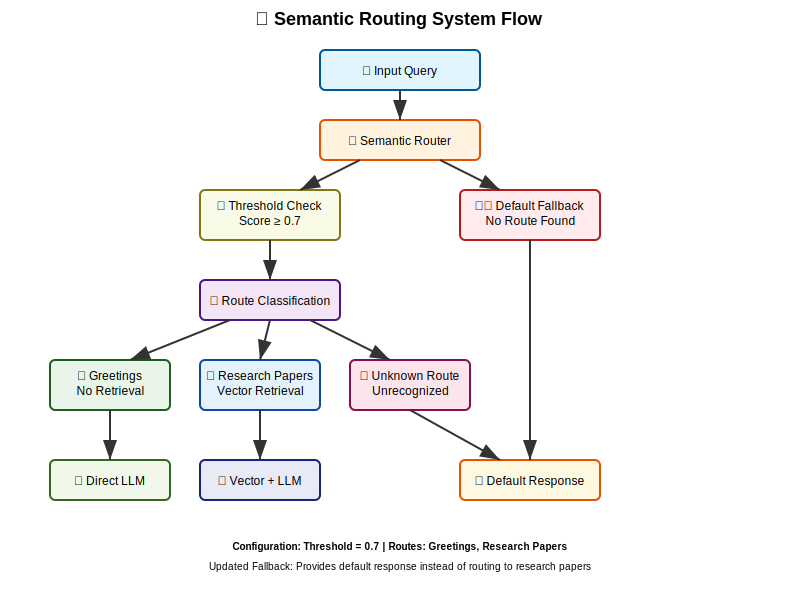

In [23]:
from IPython.display import SVG, display
display(SVG(filename="../../utils/images/routing.svg"))

## 👋 Example: Greeting Queries 

In [24]:
# Example 1: Casual greeting
query1 = "Hi there! How are you doing today?"
print(f"Query: \"{query1}\"")
result1 = semantic_layer(query1)
print(f"Result: {result1}")
print("\n" + "="*60 + "\n")

# Example 2: Gratitude expression  
query2 = "Thank you for your help with this research!"
print(f"Query: \"{query2}\"")
result2 = semantic_layer(query2)
print(f"Result: {result2}")


Query: "Hi there! How are you doing today?"
Route for the query Hi there! How are you doing today?: name='greetings' function_call=None similarity_score=np.float64(0.7550670203546611)
Result: Hi there! How are you doing today? [SYSTEM_NOTE: ROUTING: Query classified as greeting/casual conversation. No retrieval required - proceeding directly to LLM for response generation. [Confidence: 0.755]]


Query: "Thank you for your help with this research!"
Route for the query Thank you for your help with this research!: name='greetings' function_call=None similarity_score=np.float64(0.7793124134237769)
Result: Thank you for your help with this research! [SYSTEM_NOTE: ROUTING: Query classified as greeting/casual conversation. No retrieval required - proceeding directly to LLM for response generation. [Confidence: 0.779]]


## 📚 Example: Research Papers Queries

In [25]:
# Example 3: Analytics/Causal Analysis query
query3 = "What research papers discuss counterfactual generation and causal analysis methods?"
print(f"Query: \"{query3}\"")
result3 = semantic_layer(query3)
print(f"Result: {result3}")
print("\n" + "="*60 + "\n")

# Example 4: Computer Vision/Remote Sensing query
query4 = "Can you explain annotation-free segmentation techniques for remote sensing images?"
print(f"Query: \"{query4}\"")
result4 = semantic_layer(query4)
print(f"Result: {result4}")


Query: "What research papers discuss counterfactual generation and causal analysis methods?"
Route for the query What research papers discuss counterfactual generation and causal analysis methods?: name='research_papers' function_call=None similarity_score=np.float64(0.7684515359508179)
Result: What research papers discuss counterfactual generation and causal analysis methods? [SYSTEM_NOTE: ROUTING: Query classified as research-related. Retrieval enabled - routing to Research Papers vector database for context extraction. [Confidence: 0.768]]


Query: "Can you explain annotation-free segmentation techniques for remote sensing images?"
Route for the query Can you explain annotation-free segmentation techniques for remote sensing images?: name='research_papers' function_call=None similarity_score=np.float64(0.7628852951012227)
Result: Can you explain annotation-free segmentation techniques for remote sensing images? [SYSTEM_NOTE: ROUTING: Query classified as research-related. Retrieval e

## 🔄 Example: Default Fallback Query

In [26]:
# Example 5: Unrelated query (should trigger default fallback)
query5 = "Give cheesecake recipe"
print(f"Query: \"{query5}\"")
result5 = semantic_layer(query5)
print(f"Result: {result5}")

Query: "Give cheesecake recipe"
Route for the query Give cheesecake recipe: name=None function_call=None similarity_score=None
Result: Give cheesecake recipe [SYSTEM_NOTE: ROUTING: Low confidence match. No route found for the query. Provide default response for the query.]


## 🎯 Complete Demonstration (All 5 Examples)

In [27]:
# Run the complete demonstration with all 5 examples
results = run_routing_examples()

🧪 Testing Semantic Routing System...
📋 Route Configuration: 2 routes available
🎯 Similarity Threshold: 0.7
🤖 Embedding Model: Qwen/Qwen3-Embedding-0.6B
🚀 SEMANTIC ROUTING EXAMPLES DEMONSTRATION

📝 EXAMPLE 1: GREETINGS
Query: "Hi there! How are you doing today?"
Expected: Casual greeting that should route to greetings handler
Route for the query Hi there! How are you doing today?: name='greetings' function_call=None similarity_score=np.float64(0.7550670203546611)
✅ Detected Route: greetings
📊 Confidence Score: 0.755
🔄 Query with Note: Hi there! How are you doing today? [SYSTEM_NOTE: ROUTING: Query classified as greeting/casual conversation. No retrieval required - proceeding directly to LLM for response generation. [Confidence: 0.755]]
------------------------------------------------------------

📝 EXAMPLE 2: GREETINGS
Query: "Thank you for your help with this research!"
Expected: Gratitude expression that should route to greetings handler
Route for the query Thank you for your help wit